In [8]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf

yf.pdr_override()

crypto_curr = 'BTC'
actual_curr = 'USD'

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

training_set = pdr.get_data_yahoo(f'{crypto_curr}-{actual_curr}', start = start, end = end)
training_set.head()

# Selecting the second column [for prediction]
training_set = training_set.iloc[:,1:2]
training_set.head()

# Converting into 2D array
training_set = training_set.values
training_set

# Scaling of Data [Normalization]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

# Length of the Data set
training_set_size = len(training_set) - 1

X_train = training_set[0:training_set_size]
Y_train = training_set[1:training_set_size + 1]

# X_train must be equal to Y_train
len(X_train)
len(Y_train)

# Reshaping for Keras [reshape into 3 dimensions, [batch_size, timesteps, input_dim]
X_train = np.reshape(X_train, (training_set_size, 1, 1))
X_train


# RNN Layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the Recurrent Neural Network
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, batch_size = 32, epochs = 100)


[*********************100%***********************]  1 of 1 completed
Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 0.1138
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0583
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0518
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 11/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0430
Epoch 12/100
47/47 [=============================

47/47 [==============================] - 0s 2ms/step - loss: 2.4595e-04
Epoch 99/100
47/47 [==============================] - 0s 2ms/step - loss: 2.4595e-04
Epoch 100/100
47/47 [==============================] - 0s 1ms/step - loss: 2.4650e-04


[*********************100%***********************]  1 of 1 completed
36/36 [==============================] - 0s 864us/step


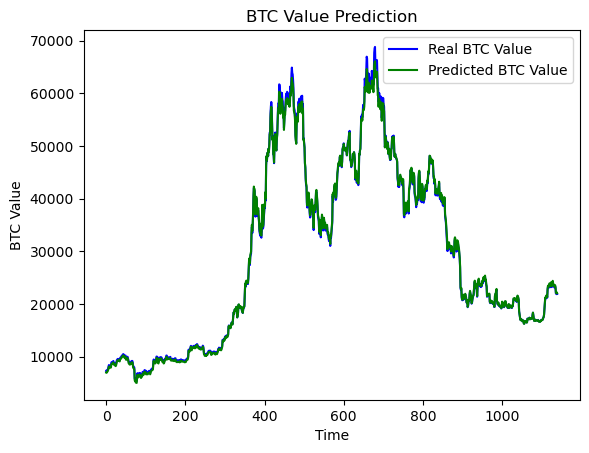

In [12]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_set = pdr.get_data_yahoo(f'{crypto_curr}-{actual_curr}', start = test_start, end = test_end)
test_set.head()

#selecting the second column from test data 
real_btc_price = test_set.iloc[:,1:2]         

# Coverting into 2D array
real_btc_price = real_btc_price.values       

#getting the predicted BTC value
inputs = real_btc_price
inputs = sc.transform(inputs)

inputs = np.reshape(inputs, (inputs.shape[0], 1, inputs.shape[1]))
predicted_btc_price = regressor.predict(inputs)
predicted_btc_price = sc.inverse_transform(predicted_btc_price)

#Graphs for predicted values
plt.plot(real_btc_price, color = 'blue', label = 'Real BTC Value')
plt.plot(predicted_btc_price, color = 'green', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Value')
plt.legend()
plt.show()
